In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.chat_models import init_chat_model
import matplotlib.pyplot as plt
import pandas as pd
import os

Dataset from Kaggle (https://www.kaggle.com/datasets/urvishahir/electric-vehicle-specifications-dataset-2025)

In [4]:
df = pd.read_csv(os.path.join("data", "electric_vehicles_spec_2025.csv.csv"))

In [5]:
df

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Zeekr,7X Premium RWD,210,71.0,Lithium-ion,NaN,440.0,148,365,6.0,...,2000.0,539,5,RWD,JD - Large,4787,1930,1650,SUV,https://ev-database.org/car/3081/Zeekr-7X-Prem...
474,Zeekr,X Core RWD (MY25),190,49.0,Lithium-ion,NaN,343.0,148,265,5.9,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3197/Zeekr-X-Core-RWD
475,Zeekr,X Long Range RWD (MY25),190,65.0,Lithium-ion,NaN,343.0,146,360,5.6,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3198/Zeekr-X-Long-...
476,Zeekr,X Privilege AWD (MY25),190,65.0,Lithium-ion,NaN,543.0,153,350,3.8,...,1600.0,362,5,AWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3199/Zeekr-X-Privi...


In [6]:
llm = init_chat_model("gemini-2.5-flash", model_provider="google_genai")

In [7]:
agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df, 
    verbose=False,
    return_intermediate_steps=True, 
    allow_dangerous_code=True,
    handle_parsing_errors=True
)

In [8]:
response = agent.invoke("how many rows of data are in this file?")
response['output']

'478'

In [9]:
response['intermediate_steps'][-1][0].tool_input.replace('; ', '\n')

'len(df)'

In [10]:
response = agent.invoke("Give me all the data the top speed is more then 205kmh.")

In [11]:
print(response['output'])

The data where the top speed is more than 205km/h is:
```
     brand                            model  top_speed_kmh  \
10    Audi                  A6 Avant e-tron            210   
11    Audi      A6 Avant e-tron performance            210   
12    Audi          A6 Avant e-tron quattro            210   
13    Audi              A6 Sportback e-tron            210   
14    Audi  A6 Sportback e-tron performance            210   
..     ...                              ...            ...   
403  Tesla               Model X Dual Motor            250   
404  Tesla                    Model X Plaid            262   
471  Zeekr                7X Long Range RWD            210   
472  Zeekr               7X Performance AWD            210   
473  Zeekr                   7X Premium RWD            210   

     battery_capacity_kWh battery_type  number_of_cells  torque_nm  \
10                   75.8  Lithium-ion            150.0      435.0   
11                   94.9  Lithium-ion            180.0  

In [12]:
response['intermediate_steps'][-1][0].tool_input.replace('; ', '\n')

"print(df[df['top_speed_kmh'] > 205])"

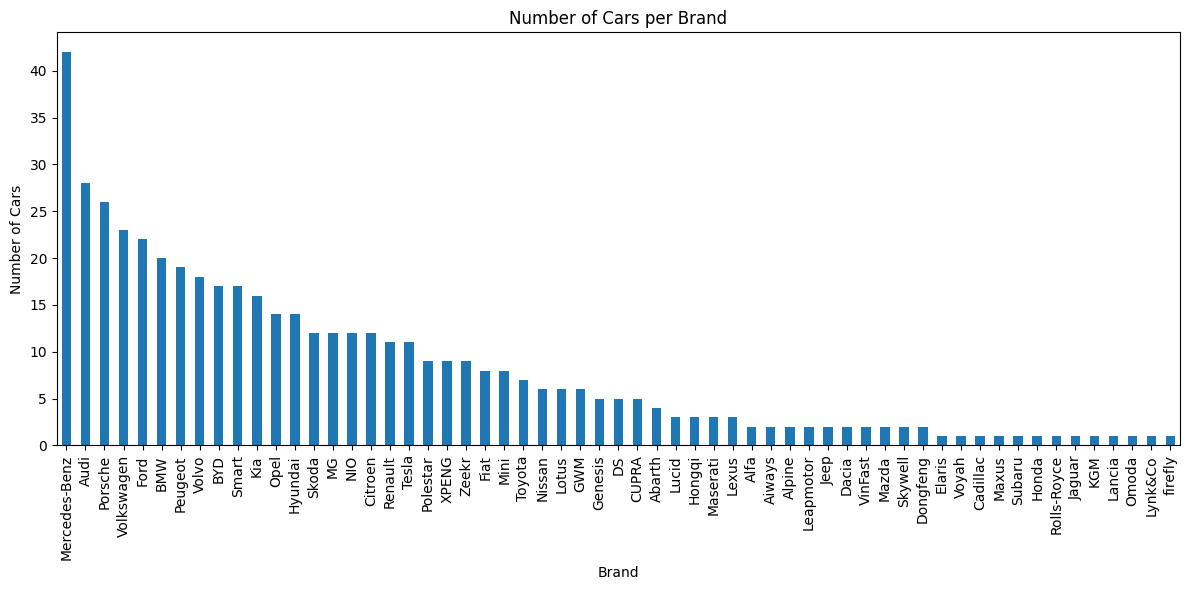

In [13]:
response = agent.invoke("Plot the number of cars per brand with bars.")

In [14]:
print(response['intermediate_steps'][-1][0].tool_input.replace('; ', '\n'))

import matplotlib.pyplot as plt
brand_counts = df['brand'].value_counts()
plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar')
plt.title('Number of Cars per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [15]:
response = agent.invoke("Analyse the car body type and plot the results appropriatly.")

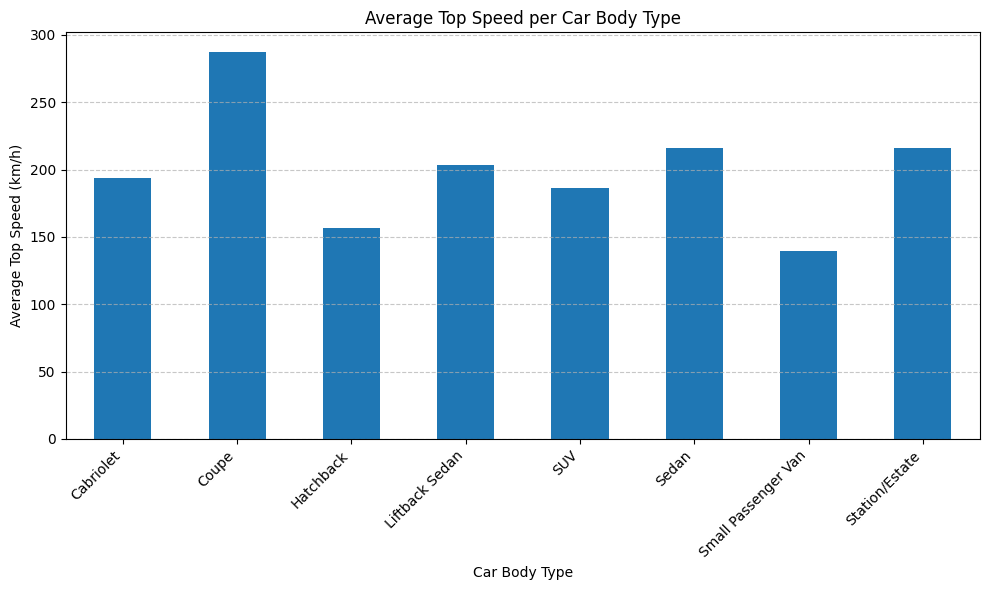

In [17]:
response = agent.invoke("Plot the average top speed per car body type.")

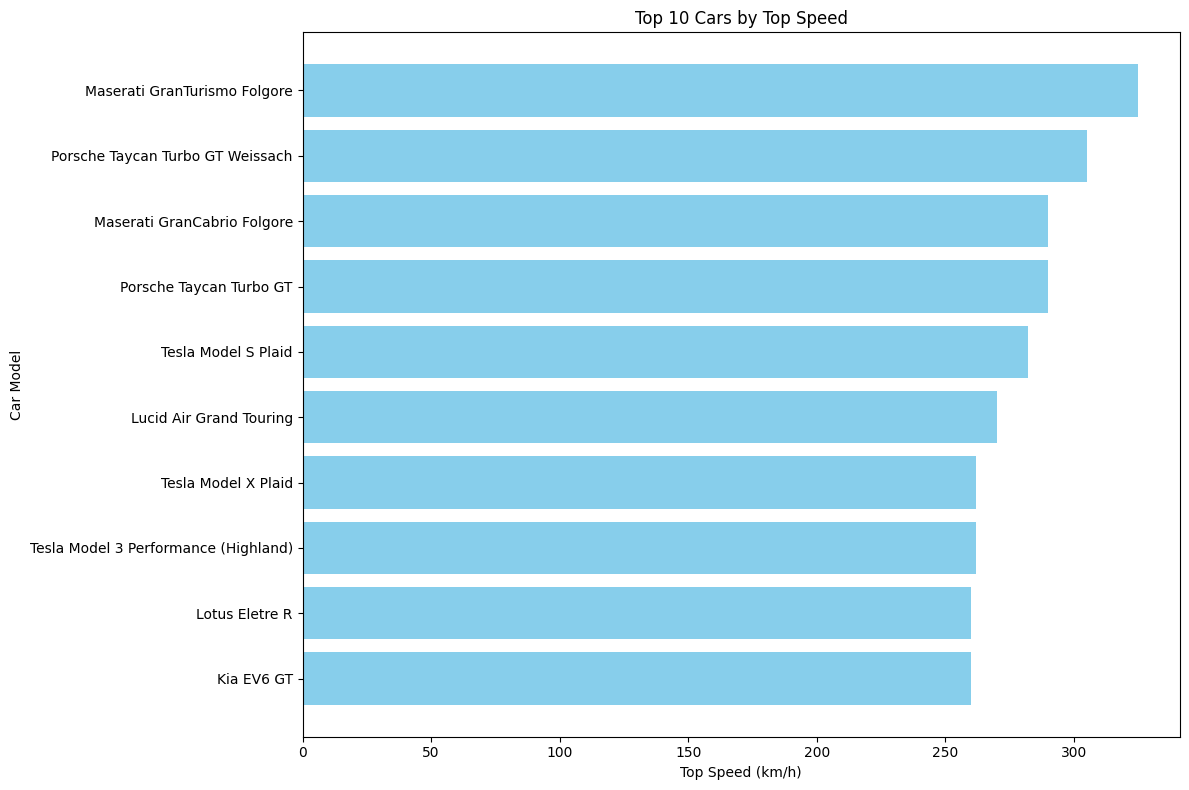

In [19]:
response = agent.invoke("Rank the top 10 cars by their top speed and plot the results.")

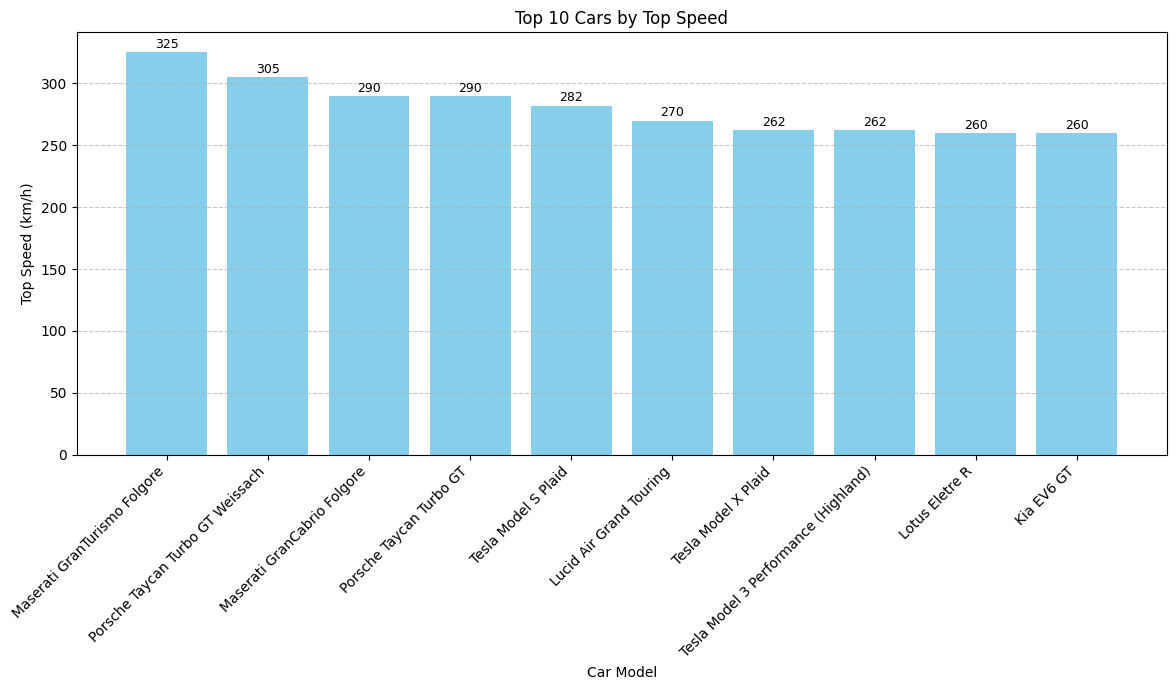

In [20]:
response = agent.invoke("Rank the top 10 cars by their top speed and plot the results. Show their top speed inside the bar.")